In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib as mpt
from datetime import datetime

In [2]:
from ggplot import *

c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
c:\users\manje_000\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
wd_dt = pd.read_csv("201402_weather_data.csv")
trip_dt = pd.read_csv("201402_trip_data.csv")

In [4]:
trip_dt.head()



,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [5]:
wd_dt.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28.0,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35.0,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31.0,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29.0,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30.0,0,6,NaN,277,94107


In [4]:
trip_dt['Start Date'] = pd.to_datetime(trip_dt['Start Date'])

In [7]:
def dateConvert(date):
    try: 
        return(datetime.strptime(date, '%m/%d/%Y %H:%M')) 
    except: 
        return(datetime.strptime(date,'%d/%m/%Y %H:%M'))

In [5]:
datetime.strptime('8/29/2013 14:13','%m/%d/%Y %H:%M')
    

datetime.datetime(2013, 8, 29, 14, 13)

In [6]:
#trip_dt['Start Date'] = trip_dt['Start Date'].apply(lambda x: dateConvert(x)).apply(lambda x: datetime.strftime(x, '%d/%m/%Y'))

In [7]:
trip_dt.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [8]:
wd_dt['Date'] = pd.to_datetime(wd_dt['Date'])

In [9]:
wd_dt.tail()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
915,2014-02-24,73,59,44,48,43,40,89,61,33,...,10,10,15,3,18.0,0,1,NaN,291,95113
916,2014-02-25,66,55,44,48,45,43,100,76,52,...,8,3,14,6,16.0,0,4,NaN,163,95113
917,2014-02-26,61,57,52,57,51,45,100,83,66,...,9,3,29,13,40.0,0.68,7,Rain,129,95113
918,2014-02-27,65,59,52,54,48,44,83,66,48,...,10,9,26,10,36.0,0.01,6,Rain,123,95113
919,2014-02-28,62,57,52,56,50,46,100,78,55,...,8,2,25,12,35.0,0.97,7,Rain,125,95113


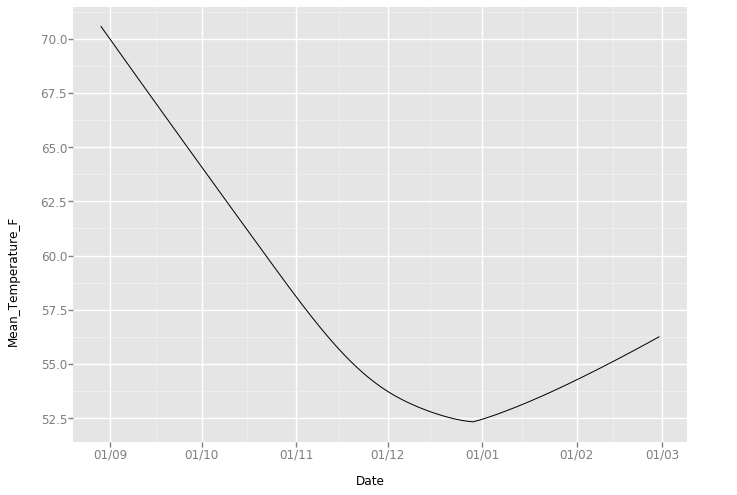

<ggplot: (1486705)>

In [17]:
ggplot(wd_dt, aes(x = 'Date', y = 'Mean_Temperature_F')) +\
stat_smooth(method = 'loess', se = 'False') +\
scale_x_date(labels = date_format("%d/%m"))

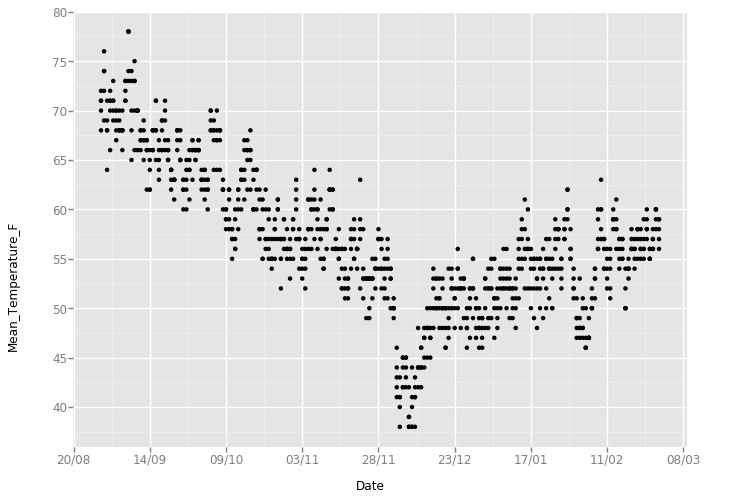

<ggplot: (1016045)>


In [18]:
print (ggplot(wd_dt, aes(x = 'Date', y = 'Mean_Temperature_F')) +\
geom_point() +\
scale_x_date(labels = date_format("%d/%m"), breaks= '1 month'))

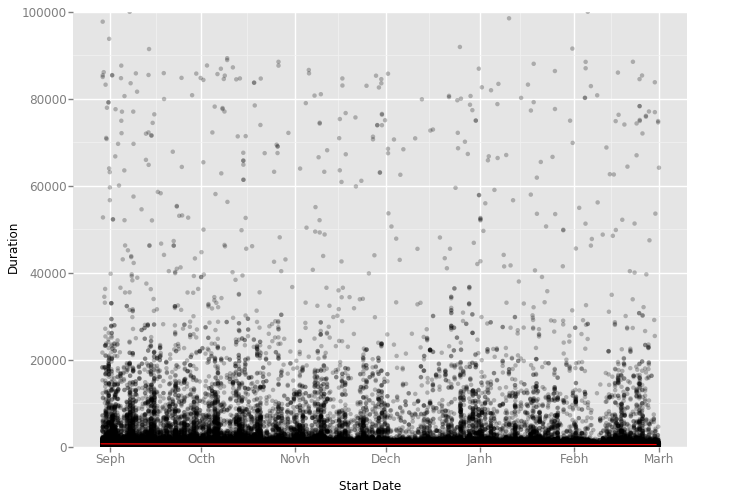

<ggplot: (35541585)>

In [39]:
ggplot(trip_dt[0:], aes(x = 'Start Date', y = 'Duration')) +\
geom_point(alpha = 0.25)  + stat_smooth(method= 'loess', color = 'red')+ \
scale_x_date(labels = date_format("%hh")) + ylim(0,100000) #+ scale_y_log() #+ facet_wrap('Start Station')

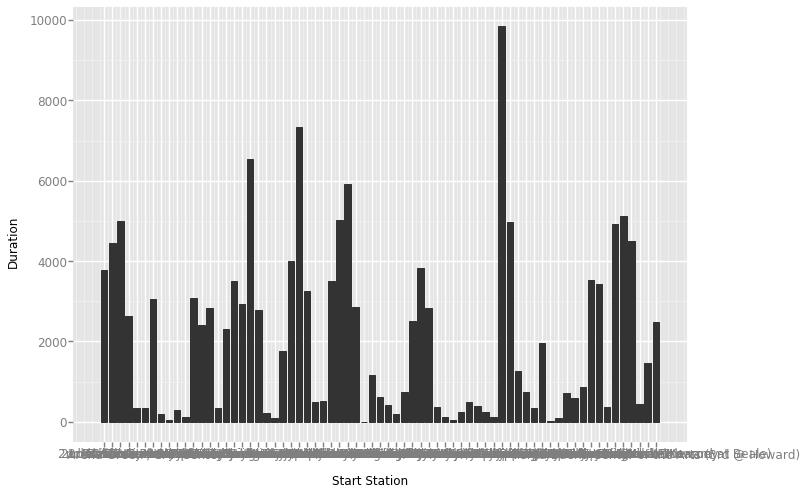

<ggplot: (38318197)>

In [31]:
ggplot(trip_dt, aes(x= 'Start Station', y = 'Duration')) + geom_bar()

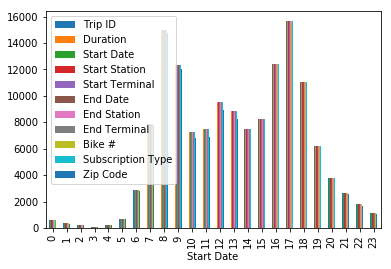

In [38]:
%matplotlib inline
trip_dt.groupby(trip_dt["Start Date"].dt.hour).count().plot(kind="bar")


In [ ]:
ggplot(aes(x='date', y='beef'), data=meat) +\
    geom_line() +\
    stat_smooth(colour='blue', span=0.2)

In [ ]:
type(wd_dt["Date"])

In [ ]:
df = pd.DataFrame({
    "x": np.random.normal(0, 10, 1000),
    "y": np.random.normal(0, 10, 1000),
    "z": np.random.normal(0, 10, 1000)
})
df2 = pd.melt(df)
df.columns

#ggplot(aes(x='value', color='variable'), data=df) + geom_point() + \
 #   geom_density()

In [ ]:
df2.columns

In [ ]:
wd_dt2 = pd.melt(wd_dt, id_vars= ['Date'], value_vars= ['Mean_Temperature_F','Min_TemperatureF','Max_Dew_Point_F'])
wd_dt2.columns